### Code from TensorFlow course
https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb#scrollTo=c9MqihtEkzQ9

In [36]:
# Import dependencies.
import json
import pprint
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Load the dataset. Data retrieved from rishabhmisra.github.io/publications
datastore = [json.loads(line) for line in open("resources/sarcasm_v2.json", 'r')]

# Print the JSON data in an easy-to-read format.
# pprint.pprint(datastore)

In [19]:
# Create lists to hold the data.
sentences = []
labels = []
urls = []

# Iterate through the data.
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [24]:
# Initialize the Tokenizer
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>") # Words not in the index will now be replaced by this Out Of Vocabulary tag.

# Train the model with sentences.
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

# Create sequences using the word index, then pad the shorter sequences.
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')

# Examine the data.
print(padded[0])
print(padded.shape)

[1 1 1 1 1 3 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(28619, 152)


In [27]:
# Set parameters for tokenizer
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [28]:
# Create the training and testing sets.
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [29]:
# Initialize the Tokenizer with just the training corpus.
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

# Create training and testing sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [30]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [33]:
# Create a model that embeds the vectors
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [35]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6580 - accuracy: 0.6130 - val_loss: 0.5491 - val_accuracy: 0.8084 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 1s - loss: 0.4238 - accuracy: 0.8318 - val_loss: 0.3750 - val_accuracy: 0.8409 - 1s/epoch - 2ms/step
Epoch 3/30
625/625 - 1s - loss: 0.3165 - accuracy: 0.8737 - val_loss: 0.3448 - val_accuracy: 0.8491 - 1s/epoch - 2ms/step
Epoch 4/30
625/625 - 1s - loss: 0.2647 - accuracy: 0.8974 - val_loss: 0.3334 - val_accuracy: 0.8546 - 1s/epoch - 2ms/step
Epoch 5/30
625/625 - 1s - loss: 0.2284 - accuracy: 0.9123 - val_loss: 0.3399 - val_accuracy: 0.8543 - 1s/epoch - 2ms/step
Epoch 6/30
625/625 - 1s - loss: 0.2023 - accuracy: 0.9240 - val_loss: 0.3374 - val_accuracy: 0.8530 - 1s/epoch - 2ms/step
Epoch 7/30
625/625 - 1s - loss: 0.1792 - accuracy: 0.9331 - val_loss: 0.3492 - val_accuracy: 0.8509 - 1s/epoch - 2ms/step
Epoch 8/30
625/625 - 1s - loss: 0.1620 - accuracy: 0.9409 - val_loss: 0.3928 - val_accuracy: 0.8363 - 1s/epoch - 2ms/step
Epoch 9/30
625/625 - 1s 

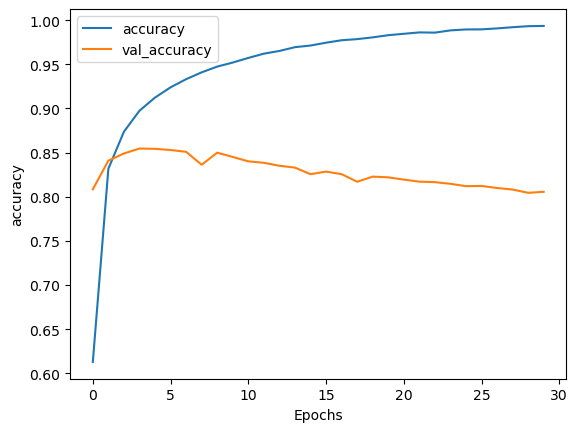

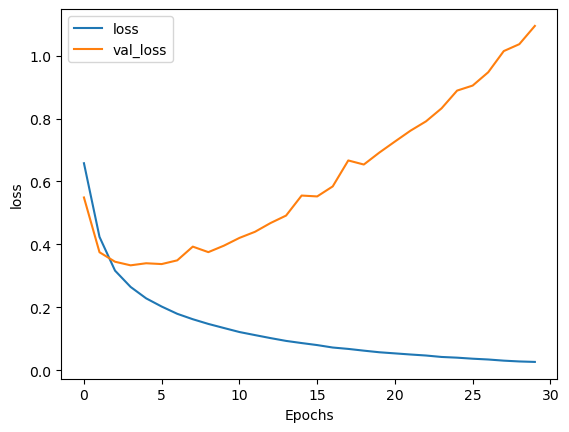

In [37]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [38]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

<OOV> scientists unveil doomsday clock of hair loss ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
eat your veggies: 9 deliciously different recipes
0


In [39]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [41]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 79ms/step
[[7.4823433e-01]
 [1.6134298e-07]]
